In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

adv = pd.DataFrame(pd.read_csv("D:/Python_Projects/Regression/Advertising.csv"))
adv.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,8.6,2.1,1.0,4.8
1,199.8,2.6,21.2,10.6
2,66.1,5.8,24.2,8.6
3,214.7,24.0,4.0,17.4
4,23.8,35.1,65.9,9.2


In [26]:
adv.shape

(192, 4)

In [27]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         192 non-null    float64
 1   Radio Ad Budget ($)      192 non-null    float64
 2   Newspaper Ad Budget ($)  192 non-null    float64
 3   Sales ($)                192 non-null    float64
dtypes: float64(4)
memory usage: 6.1 KB


In [28]:
adv.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,192.000000,192.000000,192.000000,192.000000
mean,148.947917,22.793750,29.688542,14.057812
std,85.700468,14.758015,21.354200,5.239184
min,0.700000,0.000000,0.300000,1.600000
25%,75.250000,9.525000,12.550000,10.375000
50%,153.200000,22.000000,25.600000,12.900000
75%,219.925000,35.650000,43.125000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [29]:
# Dataset preparation

# Null check
adv.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

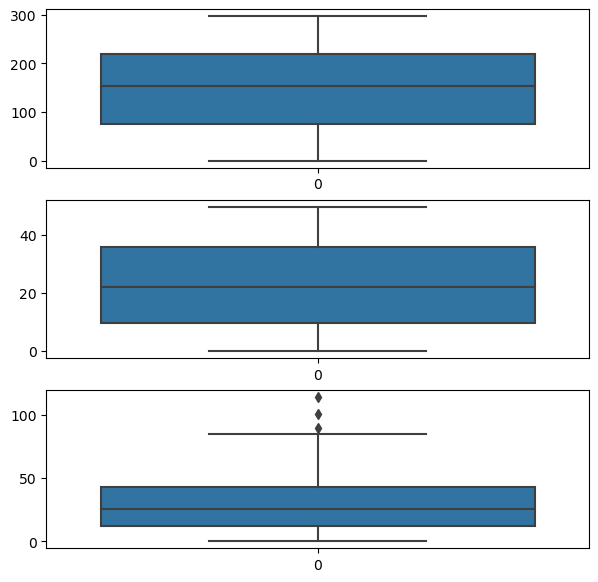

In [50]:
# Outliers check
fig, axs = plt.subplots(3, figsize = (7,7))
plt1 = sns.boxplot(adv['TV Ad Budget ($)'], ax = axs[0])
plt2 = sns.boxplot(adv['Radio Ad Budget ($)'], ax = axs[1])
plt3 = sns.boxplot(adv['Newspaper Ad Budget ($)'], ax = axs[2])

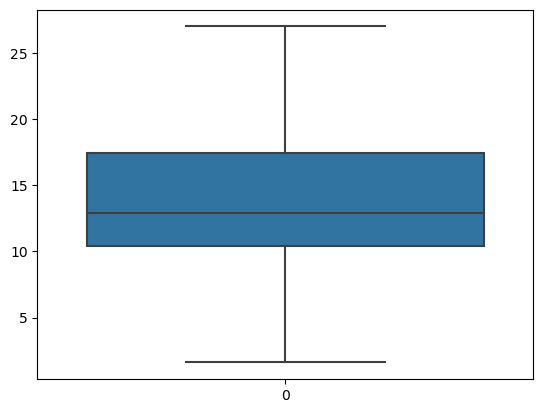

In [51]:
# Target
sns.boxplot(adv['Sales ($)'])
plt.show()

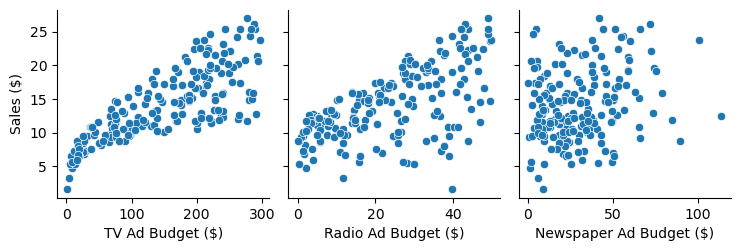

In [52]:
sns.pairplot(adv, x_vars=['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)'], y_vars='Sales ($)')
plt.show()

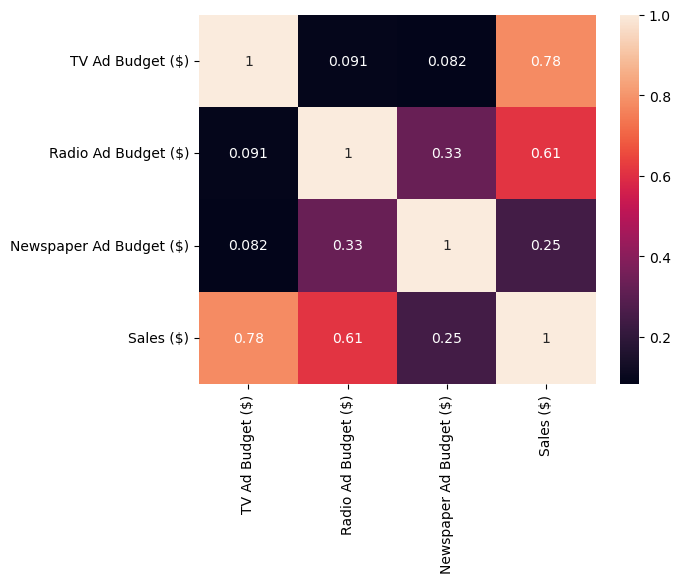

In [53]:
sns.heatmap(adv.corr(), annot=True)
plt.show()

In [2]:
# Dataset composing
import pandas as pd
from sklearn.model_selection import train_test_split
adv = pd.DataFrame(pd.read_csv("D:/Python_Projects/Regression/Advertising.csv"))

X = adv.drop(["Sales ($)", "Newspaper Ad Budget ($)"], axis=1)
y = adv['Sales ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [3]:
# Let's take a look at the train dataset

X_train.head()

,TV Ad Budget ($),Radio Ad Budget ($)
8,67.8,36.6
101,255.4,26.9
89,184.9,21.0
90,289.7,42.3
118,7.8,38.9


In [4]:
y_train.head()

8      12.5
101    19.8
89     15.5
90     25.4
118     6.6
Name: Sales ($), dtype: float64

In [5]:
# Linear regression; y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n

import statsmodels.api as sm

# Put w0, because it is not listed in sm 
X_train_full = sm.add_constant(X_train)
X_train_full

,const,TV Ad Budget ($),Radio Ad Budget ($)
8,1.0,67.8,36.6
101,1.0,255.4,26.9
89,1.0,184.9,21.0
90,1.0,289.7,42.3
118,1.0,7.8,38.9
...,...,...,...
103,1.0,241.7,38.0
67,1.0,16.9,43.7
117,1.0,87.2,11.8
47,1.0,198.9,49.4


In [6]:
# OLS - ordinary least squares - The liner regression which will find rations using ordinary least squares method
model = sm.OLS(y_train, X_train_full).fit()

model.params

const                  3.187853
TV Ad Budget ($)       0.044061
Radio Ad Budget ($)    0.191818
dtype: float64

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sales ($)   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     875.8
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.87e-83
Time:                        13:02:52   Log-Likelihood:                -275.47
No. Observations:                 153   AIC:                             556.9
Df Residuals:                     150   BIC:                             566.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1879      0.284     11.229      0.000       2.627       3.749
TV Ad Budget ($)        0.0441      0.001     31.493      0.000       0.041       0.047
Radio Ad Budget ($)     0.1918      0.008     23.077      0.000       0.175       0.208
==============================================================================
Omnibus:                       15.167   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.715
Skew:                          -0.792   Prob(JB):                     0.000235
Kurtosis:                       3.333   Cond. No.                         409.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

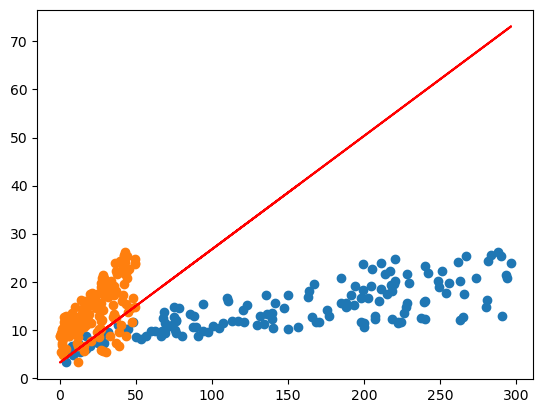

In [30]:
plt.scatter(X_train.iloc[:,0].values, y_train)
plt.scatter(X_train.iloc[:,1].values, y_train)

plt.plot(X_train, 3.1879 + 0.0441 * X_train + 0.1918 * X_train, 'r')
plt.show()

In [32]:
# Model's estimation
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_test_full = sm.add_constant(X_test)
y_pred = model.predict(X_test_full)

mean_squared_error(y_test, y_pred)

4.656097529136622

In [33]:
mean_absolute_error(y_test, y_pred)

1.4829355381950662

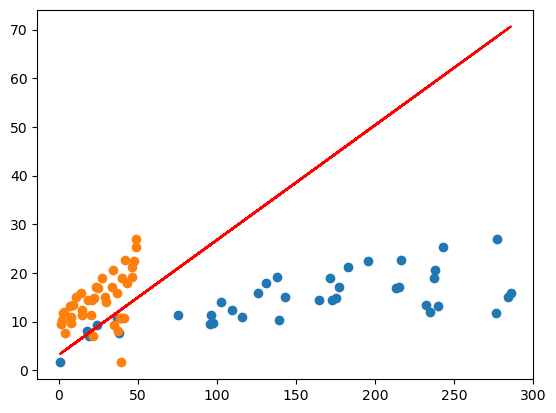

In [35]:
plt.scatter(X_test.iloc[:,0].values, y_test)
plt.scatter(X_test.iloc[:,1].values, y_test)

plt.plot(X_test, 3.1879 + 0.0441 * X_test + 0.1918 * X_test, 'r')
plt.show()